In [1]:
## Data preparation

In [1]:
price_url = "https://etherscan.io/chart/etherprice?output=csv"
market_capitalization_url = "https://etherscan.io/chart/marketcap?output=csv"
supply_growth_url = "https://etherscan.io/chart/ethersupplygrowth?output=csv"
daily_transactions_url = "https://etherscan.io/chart/tx?output=csv"
daily_token_transfer_url = "https://etherscan.io/chart/tokenerc-20txns?output=csv"
unique_address_url = "https://etherscan.io/chart/address?output=csv"
avg_block_size_url = "https://etherscan.io/chart/blocksize?output=csv"
avg_block_time_url = "https://etherscan.io/chart/blocktime?output=csv"
avg_gas_price_url = "https://etherscan.io/chart/gasprice?output=csv"
avg_gas_limit_url = "https://etherscan.io/chart/gaslimit?output=csv"
daily_gas_used_url = "https://etherscan.io/chart/gasused?output=csv"
daily_block_reward_url = "https://etherscan.io/chart/blockreward?output=csv"
block_count_rewards_url = "https://etherscan.io/chart/blocks?output=csv"
uncle_count_rewards_url = "https://etherscan.io/chart/uncles?output=csv"
net_hashrte_url = "https://etherscan.io/chart/hashrate?output=csv"
net_difficulty_url = "https://etherscan.io/chart/difficulty?output=csv"
pending_transactions_url = "https://etherscan.io/chart/pendingtx?output=csv"
net_transaction_fee_url = "https://etherscan.io/chart/transactionfee?output=csv"
net_utilization_url = "https://etherscan.io/chart/networkutilization?output=csv"
daily_verified_contracts_url = "https://etherscan.io/chart/verified-contracts?output=csv"

In [2]:
import pandas as pd
from urllib.request import Request, urlopen

def read_data(url):
  req = Request(url)
  req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
  content = urlopen(req)

  return pd.read_csv(content)

In [3]:
url_list = [
              ("price", price_url),
              ("market cap.", market_capitalization_url),
              ("supply growth", supply_growth_url),
              ("daily trans.", daily_transactions_url),
              ("daily token trans.", daily_token_transfer_url),
              ("uniq. address", unique_address_url),
              ("avg blk size", avg_block_size_url),
              ("avg blk time", avg_block_time_url),
              ("avg gas price", avg_gas_price_url),
              ("avg gas limit", avg_gas_limit_url),
              ("daily gas used", daily_gas_used_url),
              ("daily blk reward", daily_block_reward_url),
              ("blk count reward", block_count_rewards_url),
              ("uncle count reward", uncle_count_rewards_url),
              ("net hashrte", net_hashrte_url),
              ("net diff.", net_difficulty_url),
              # ("pending trans.", pending_transactions_url),
              ("net trans. fee", net_transaction_fee_url),
              ("net util.", net_utilization_url),
              # ("daily verified contracts", daily_verified_contracts_url),
]

df_list = []
for column_name, url in url_list:
  df = read_data(url)
  df["Date(UTC)"] = pd.to_datetime(df["Date(UTC)"]).dt.strftime('%m/%d/%Y')

  if "UnixTimeStamp" in df.columns:
    df = df.drop("UnixTimeStamp", 1)
    
  if "Value" in df.columns:
    df = df.rename(columns={"Value": column_name})

  df_list.append(df)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12456\452214062.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("UnixTimeStamp", 1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12456\452214062.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("UnixTimeStamp", 1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12456\452214062.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("UnixTimeStamp", 1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12456\452214062.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("UnixTimeStamp", 1)
C:\Users\Administrator\AppData\L

In [4]:
from functools import reduce

df_total = reduce(lambda df1, df2: pd.merge(df1, df2, on='Date(UTC)'), df_list)
df_total = df_total.rename(columns={"Value (Wei)": "avg gas price"})
df_total

,Date(UTC),price,Supply,MarketCap,Price,supply growth,daily trans.,No. of ERC20 Token Transfers,uniq. address,avg blk size,...,avg gas price,avg gas limit,daily gas used,daily blk reward,blk count reward,uncle count reward,net hashrte,net diff.,net trans. fee,net util.
0,07/30/2015,0.00,7.204931e+07,0.000000,0.00,7.204931e+07,8893,0,9205,644,...,0,0,0,39316.09375,6912,1299,11.5297,0.121,0,0.0000
1,07/31/2015,0.00,7.208550e+07,0.000000,0.00,7.208550e+07,0,0,9361,582,...,0,0,0,36191.71875,6863,511,51.4594,0.603,0,0.0000
2,08/01/2015,0.00,7.211320e+07,0.000000,0.00,7.211320e+07,0,0,9476,575,...,0,0,0,27705.93750,5293,334,57.7845,0.887,0,0.0000
3,08/02/2015,0.00,7.214143e+07,0.000000,0.00,7.214143e+07,0,0,9563,581,...,0,0,0,28223.43750,5358,394,67.9224,1.020,0,0.0000
4,08/03/2015,0.00,7.216940e+07,0.000000,0.00,7.216940e+07,0,0,9639,587,...,0,0,0,27976.71875,5280,443,74.5737,1.126,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,10/10/2022,1290.04,1.223736e+08,157866.884539,"1,290.04",1.205294e+08,1123390,716017,207604560,55629,...,37582169969,29999989,109776077729,0.00000,7165,0,0.0000,0.000,484276116070808203508,0.5107
2630,10/11/2022,1279.79,1.223736e+08,156612.554777,"1,279.79",1.205282e+08,1130309,788244,207757168,61347,...,29333893936,29999995,109645622117,0.00000,7164,0,0.0000,0.000,415370526126514681900,0.5102
2631,10/12/2022,1294.29,1.223736e+08,158386.972489,"1,294.29",1.205279e+08,1074204,681879,207907342,65259,...,22281959320,30000000,109724089651,0.00000,7164,0,0.0000,0.000,447678742603832433673,0.5105
2632,10/13/2022,1287.51,1.223736e+08,157557.279241,"1,287.51",1.205273e+08,1124129,779874,208018737,76420,...,27488686311,29999997,109491056408,0.00000,7157,0,0.0000,0.000,606219925137196795771,0.5099


In [7]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date(UTC)                     1903 non-null   object 
 1   price                         1903 non-null   float64
 2   Supply                        1903 non-null   float64
 3   MarketCap                     1903 non-null   float64
 4   Price                         1903 non-null   object 
 5   supply growth                 1903 non-null   float64
 6   daily trans.                  1903 non-null   int64  
 7   No. of ERC20 Token Transfers  1903 non-null   int64  
 8   uniq. address                 1903 non-null   int64  
 9   avg blk size                  1903 non-null   int64  
 10  avg blk time                  1903 non-null   float64
 11  avg gas price                 1903 non-null   int64  
 12  avg gas limit                 1903 non-null   int64  
 13  dai

In [8]:
# df_total.to_csv("drive/My Drive/Colab Notebooks/etheruem_data.csv")
df_total = pd.read_csv("etheruem_data.csv")
df_total = df_total.drop("Unnamed: 0", 1)
df_total

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12456\1526417415.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop("Unnamed: 0", 1)


,Date(UTC),price,Supply,MarketCap,Price,supply growth,daily trans.,No. of ERC20 Token Transfers,uniq. address,avg blk size,...,avg gas price,avg gas limit,daily gas used,daily blk reward,blk count reward,uncle count reward,net hashrte,net diff.,net trans. fee,net util.
0,07/30/2015,0.00,7.204931e+07,0.000000,0.00,7.204931e+07,8893,0,9205,644,...,0,0,0,39316.09375,6912,1299,11.5297,0.121,0,0.0000
1,07/31/2015,0.00,7.208550e+07,0.000000,0.00,7.208550e+07,0,0,9361,582,...,0,0,0,36191.71875,6863,511,51.4594,0.603,0,0.0000
2,08/01/2015,0.00,7.211320e+07,0.000000,0.00,7.211320e+07,0,0,9476,575,...,0,0,0,27705.93750,5293,334,57.7845,0.887,0,0.0000
3,08/02/2015,0.00,7.214143e+07,0.000000,0.00,7.214143e+07,0,0,9563,581,...,0,0,0,28223.43750,5358,394,67.9224,1.020,0,0.0000
4,08/03/2015,0.00,7.216940e+07,0.000000,0.00,7.216940e+07,0,0,9639,587,...,0,0,0,27976.71875,5280,443,74.5737,1.126,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,10/09/2020,365.41,1.129408e+08,41269.687896,365.41,1.129408e+08,1049571,920272,117574906,37292,...,80387358281,12453527,77357297734,13342.37500,6378,342,257731.4794,3313.690,5752785534866861518614,0.9741
1899,10/10/2020,370.88,1.129543e+08,41892.488339,370.88,1.129543e+08,1036351,891639,117739687,35619,...,64197264627,12466925,76569429799,13520.31250,6509,293,262559.7762,3335.073,4494541295798936979940,0.9436
1900,10/11/2020,374.40,1.129680e+08,42295.205336,374.40,1.129680e+08,1004701,887063,117980843,35265,...,49653860265,12467821,79786775919,13669.56250,6569,313,260752.4476,3273.614,3585365603350568699498,0.9743
1901,10/12/2020,386.91,1.129815e+08,43713.660207,386.91,1.129815e+08,1092162,942638,118137338,38657,...,76063541206,12469822,78295187648,13506.12500,6457,354,259780.9543,3295.415,5515120626498358226212,0.9724


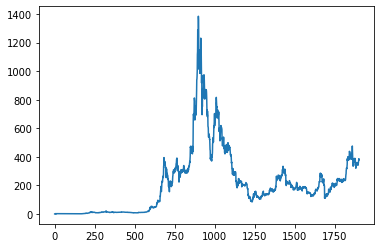

In [9]:
import matplotlib.pyplot as plt

df_total["price"].plot()
plt.show()

In [10]:
## Data preprocessing

In [11]:
import tensorflow as tf

# df_months = pd.to_datetime(df_total["Date(UTC)"]).dt.strftime('%m').astype("int16")
# df_days = pd.to_datetime(df_total["Date(UTC)"]).dt.strftime('%d').astype("int16")
# months = pd.DataFrame(tf.keras.utils.to_categorical(df_months)[:, 1:], columns=["Month "+str(i) for i in range(1, 13)]).astype("int")
# days = pd.DataFrame(tf.keras.utils.to_categorical(df_days)[:, 1:], columns=["Day "+str(i) for i in range(1, 32)]).astype("int")
# df_total = pd.concat([df_total, months, days], axis=1)
# df_total

ModuleNotFoundError: No module named 'tensorflow.python.eager.polymorphic_function'

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

series = df_total[[column for column in df_total.columns if column not in ["Date(UTC)"]]]
series = series.applymap(lambda value: value.replace(",", "") if type(value) is str else value)
series = series.to_numpy()
scaler = MinMaxScaler()
series = scaler.fit_transform(series)

In [13]:
split_time = 1500

time = np.array(df_total.index)
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 90
batch_size = 512
shuffle_buffer_size = 1000

In [14]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1][0]))
  dataset = dataset.batch(batch_size).prefetch(1)
  
  return dataset

In [15]:
tf.keras.backend.clear_session()

train_set = windowed_dataset(x_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

NameError: name 'tf' is not defined

In [62]:
## Training model

In [236]:
model = tf.keras.models.Sequential([
  # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), batch_input_shape=[None, window_size, series.shape[1]]),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(filters=32, kernel_size=3), name="Conv1d_1"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2), name="maxpool_1"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2), name="dropout_1"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(filters=32, kernel_size=3), name="Conv1d_2"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2), name="maxpool_2"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2), name="dropout_2"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten(), name="flatten"),
  tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="causal", activation="relu", input_shape=[None, series.shape[1]]),
  # tf.keras.layers.MaxPool1D(pool_size=2),
  tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="causal", activation="relu"),
  # tf.keras.layers.MaxPool1D(pool_size=2),
  # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1),
  # tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr = 0.1
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lr * np.power(0.6, np.floor((1 + epoch)/20)))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="mae", patience=5, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(lr=lr)
# optimizer = tf.keras.optimizers.SGD(lr=lr, momentum=0.9)
model.compile(loss="mse",
              optimizer=optimizer,
              metrics=["mae"])

model.summary()

history = model.fit(train_set, epochs=200, callbacks=[
                                                      lr_schedule, 
                                                      # early_stopping,
                                                      ])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, None, 128)         7808      
_________________________________________________________________
conv1d_26 (Conv1D)           (None, None, 64)          24640     
_________________________________________________________________
bidirectional_49 (Bidirectio (None, None, 256)         197632    
_________________________________________________________________
bidirectional_50 (Bidirectio (None, None, 256)         394240    
_________________________________________________________________
bidirectional_51 (Bidirectio (None, 256)               394240    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 1)               

KeyboardInterrupt: ignored

In [ ]:
plt.plot(np.arange(200), 0.1*np.power(0.6, np.floor((1 + np.arange(200))/20)))

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.show()

In [ ]:
# optimizer = tf.keras.optimizers.SGD(lr=5e-4, momentum=0.9)
# model.compile(loss=tf.keras.losses.Huber(),
#               optimizer=optimizer,
#               metrics=["mae"])

# history = model.fit(train_set, epochs=400)

In [ ]:
def plot_series(time, series, label, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

In [ ]:
# scaler2 = MinMaxScaler()
# scaler2.data_max_ = scaler.data_max_[0]
# scaler2.data_min_ = scaler.data_min_[0]
# scaler2.min_ = scaler.min_[0]
# scaler2.scale_ = scaler.scale_[0]

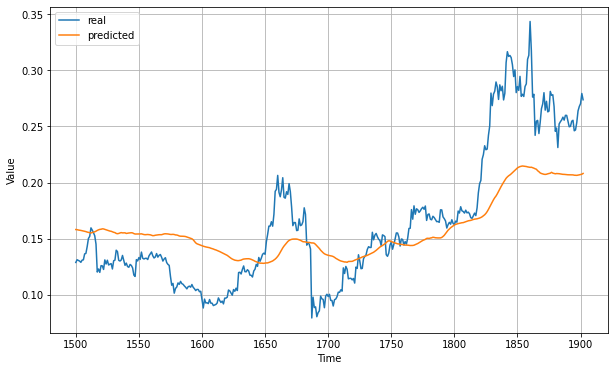

In [227]:
forecast=[]
for time in range(len(series) - window_size):
  pred = model.predict(series[time:time + window_size][np.newaxis])
  # rescaled_pred = scaler2.inverse_transform(pred)
  # pred = pred / 100.
  forecast.append(pred)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid[:, 0], "real")
plot_series(time_valid, results, "predicted")

In [228]:
tf.keras.metrics.mean_absolute_error(x_valid[:, 0], results).numpy()

0.032669377

In [72]:
## Test phase

In [ ]:
model.predict(series[-window_size:][np.newaxis])[0, 0] - model.predict(series[-window_size-1:-1][np.newaxis])[0, 0]

0.0011415184

In [ ]:
scaler2 = MinMaxScaler()
scaler2.min_ = scaler.min_[0]
scaler2.scale_ = scaler.scale_[0]
print(scaler2.inverse_transform(model.predict(series[-window_size-1:-1][np.newaxis]))[0, 0])
print(scaler2.inverse_transform(model.predict(series[-window_size:][np.newaxis]))[0, 0])

366.3563
367.93732


1887 rows
Latest row is from 2022-10-15 00:00:00


04:03:15 - cmdstanpy - INFO - Chain [1] start processing
04:03:15 - cmdstanpy - INFO - Chain [1] done processing


Data fitted
          Date    Price  Price (forecast)        trend   yhat_lower  \
0   2022-10-15  1297.60               NaN          NaN          NaN   
1   2022-10-14  1296.27               NaN          NaN          NaN   
2   2022-10-13  1287.08               NaN          NaN          NaN   
3   2022-10-12  1294.44               NaN          NaN          NaN   
4   2022-10-11  1280.11               NaN          NaN          NaN   
..         ...      ...               ...          ...          ...   
360 2023-10-11      NaN      -1362.621078 -1292.768737 -2513.604266   
361 2023-10-12      NaN      -1364.959594 -1299.721306 -2552.413530   
362 2023-10-13      NaN      -1365.764411 -1306.673874 -2534.328716   
363 2023-10-14      NaN      -1356.952787 -1313.626442 -2526.770344   
364 2023-10-15      NaN      -1350.814133 -1320.579010 -2594.238404   

     yhat_upper  trend_lower  trend_upper  additive_terms  \
0           NaN          NaN          NaN             NaN   
1           N

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12456\2228207389.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_df.tail(1).rename(columns = {"y": "yhat"}))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12456\2228207389.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(forecast)


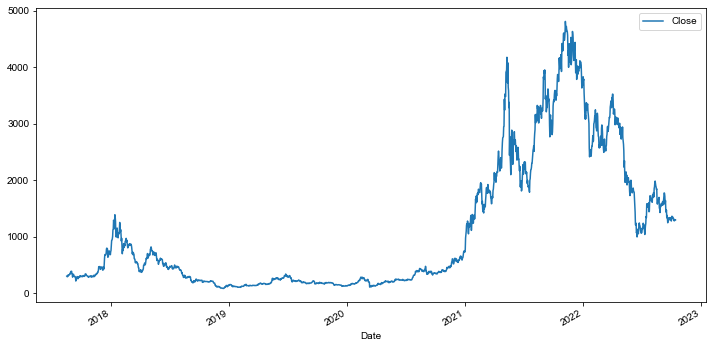

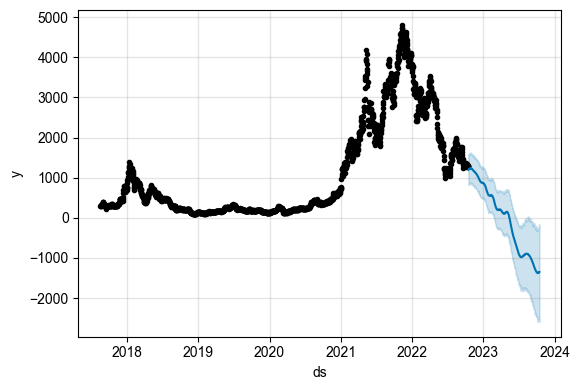

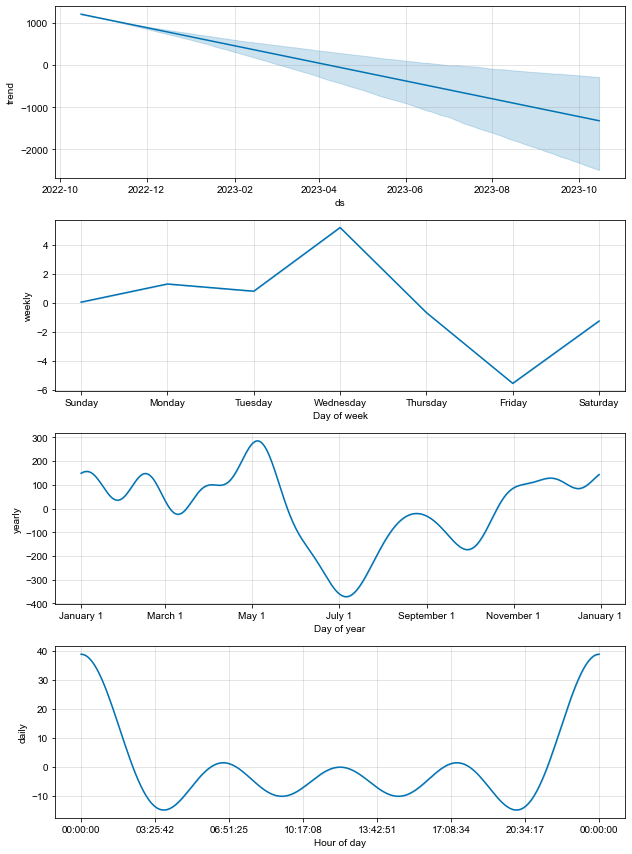

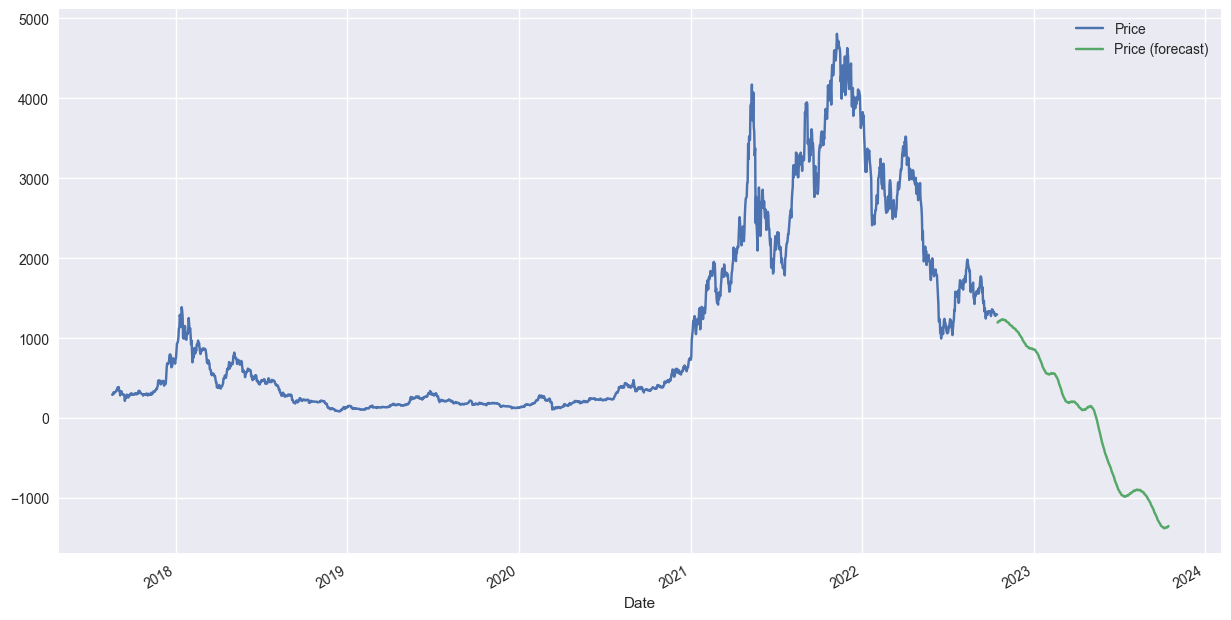

In [16]:
import pandas as pd

FILE_NAME = "data/ethereum.csv"

eth = pd.read_csv(FILE_NAME)

print(f"{len(eth)} rows")

eth["Date"] = pd.to_datetime(eth['Date'])

last_date = eth["Date"].max()

print(f"Latest row is from {last_date}")

eth.head()

# eth.info()

eth.describe()

eth.plot(kind="line", x="Date", y="Close", figsize=(12,6))

prophet_data = eth[["Date", "Close"]]

prophet_data = prophet_data.rename(columns = {
    "Date": "ds",
    "Close": "y"
})

prophet_data.head()

from prophet import Prophet

prophet = Prophet(daily_seasonality=True)

prophet.fit(prophet_data)

print("Data fitted")

future = prophet.make_future_dataframe(periods=365, include_history=False)

future.tail()

forecast = prophet.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# forecast.info()

import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(dpi=100)

fig.set_facecolor("white")

prophet_plot_forecast_fig = prophet.plot(forecast, ax=fig.gca());

prophet_plot_forecast_fig.savefig('forecast_details.png')

prophet.plot_components(forecast);

PLOT_COLUMS = [
    "Price",
    "Price (forecast)",
]

mpl.style.use("seaborn")

result_df = prophet_data.copy()

# Add first result from forecast as y to connect dots
result_df = result_df.append(result_df.tail(1).rename(columns = {"y": "yhat"}))

result_df = result_df.append(forecast)

result_df = result_df.rename(columns = {
    "ds": "Date",
    "y": "Price",
    "yhat": "Price (forecast)"
})

fig = plt.figure(dpi=100)

fig.set_facecolor("white")

plot = result_df.plot(x="Date", y=PLOT_COLUMS, figsize=(15, 8), ax=fig.gca())

plot_fig = plot.get_figure()

plot_fig.savefig('forecast.png')

print(result_df)